In [ ]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

from numpy.random import seed

seed(11111)

In [ ]:
!pip install pycaret
#pip install pycaret-nightly

In [ ]:
import numpy as np 
import pandas as pd
from google.colab import files
#uploaded = files.upload()

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
from pycaret.classification import *

In [ ]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S


In [ ]:
# Putting on index to each dataset before split it
train = train.set_index("PassengerId")
test = test.set_index("PassengerId")

# dataframe 

df = pd.concat([train, test], axis=0, sort=False)
# let us try only with train data set
#df = train

In [ ]:
# Sex
change = {'female':0,'male':1}
df.Sex = df.Sex.map(change)

# Embarked
change = {'S':0,'C':1,'Q':2}
df.Embarked = df.Embarked.map(change)

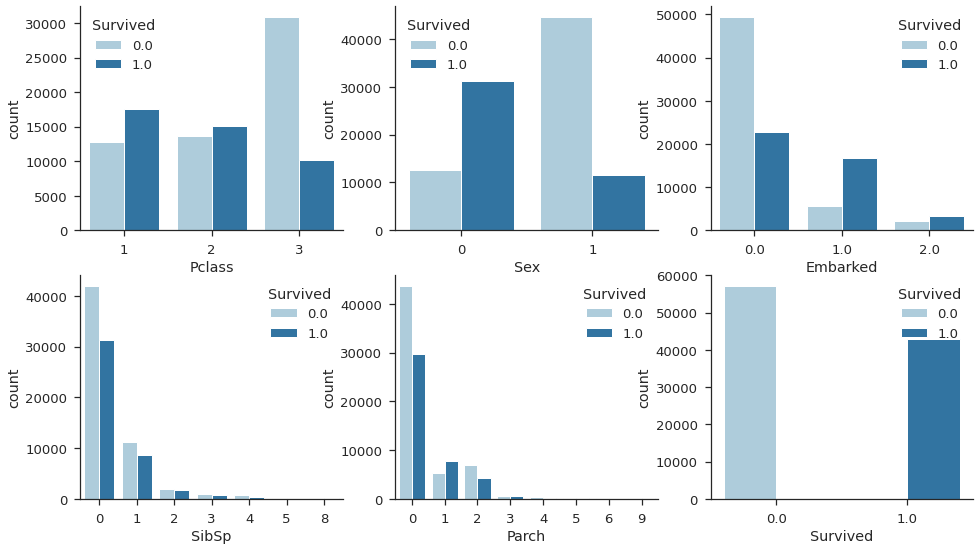

In [ ]:
columns = ['Pclass', 'Sex','Embarked','SibSp', 'Parch','Survived']

plt.figure(figsize=(16, 14))
sns.set(font_scale= 1.2)
sns.set_style('ticks')

for i, feature in enumerate(columns):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=feature, hue='Survived', palette='Paired')
    
sns.despine()

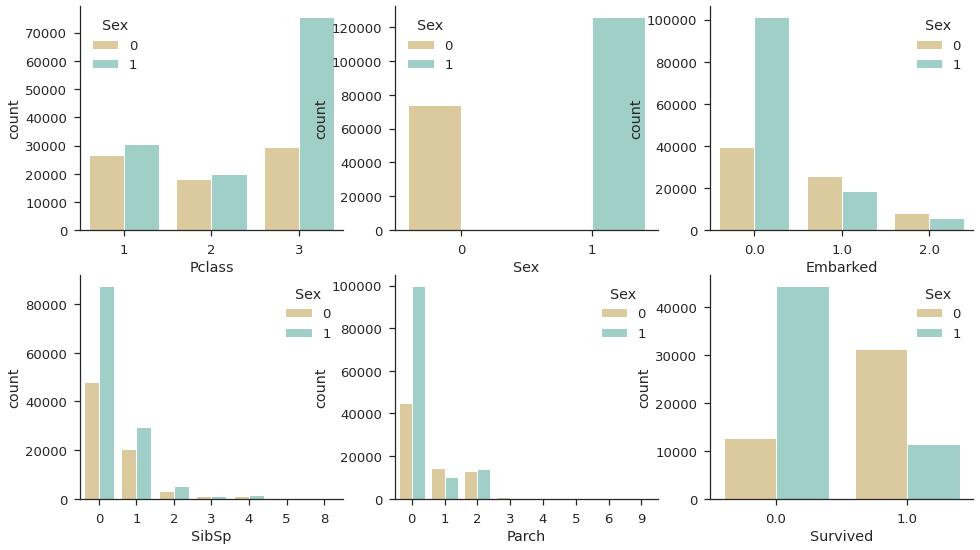

In [ ]:
columns = ['Pclass', 'Sex','Embarked','SibSp', 'Parch','Survived']

plt.figure(figsize=(16, 14))
sns.set(font_scale= 1.2)
sns.set_style('ticks')

for i, feature in enumerate(columns):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=feature, hue='Sex', palette='BrBG')
    
sns.despine()


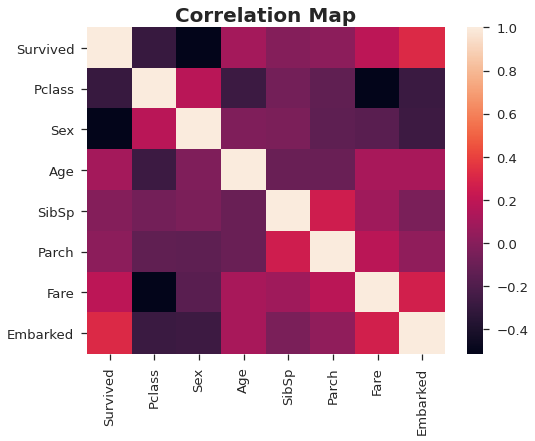

In [ ]:
corr_df = df.corr()
fig, axs = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_df).set_title("Correlation Map",fontdict= { 'fontsize': 20, 'fontweight':'bold'});

In [ ]:
df.groupby(['Pclass','Sex','Survived'])['Age'].median()

Pclass  Sex  Survived
1       0    0.0         50.00
             1.0         49.00
        1    0.0         44.00
             1.0         45.00
2       0    0.0         36.00
             1.0         41.00
        1    0.0         36.25
             1.0         39.00
3       0    0.0         27.00
             1.0         29.00
        1    0.0         32.00
             1.0         28.00
Name: Age, dtype: float64

In [ ]:
#Filling the missing values with mean of Pclass and Sex.
df["Age"].fillna(df.groupby(['Pclass','Sex'])['Age'].transform("mean"), inplace=True)


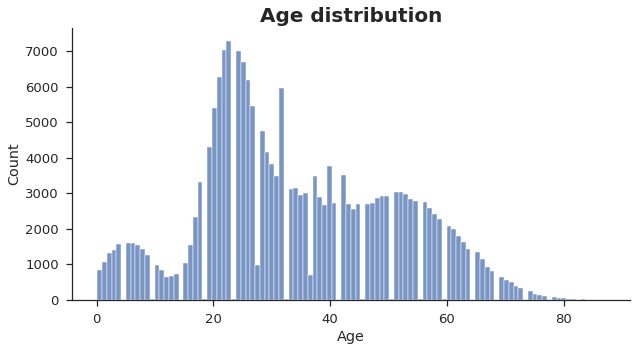

In [ ]:
fig, axs = plt.subplots(figsize=(10, 5))
sns.histplot(data=df, x='Age').set_title("Age distribution",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()

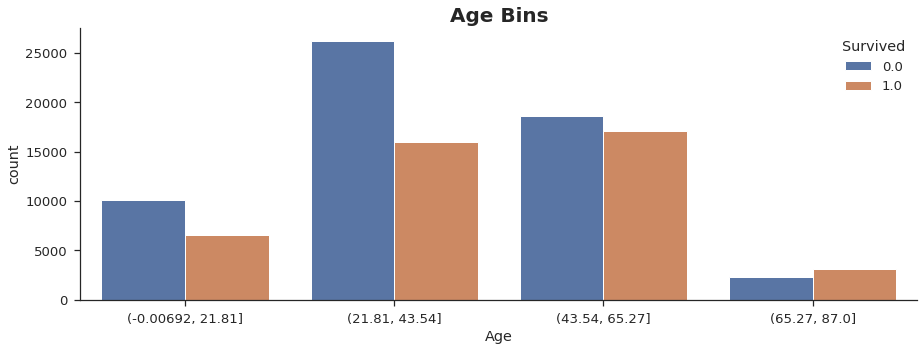

In [ ]:
auxage = pd.cut(df['Age'], 4)
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x=auxage, hue='Survived', data=df).set_title("Age Bins",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()



In [ ]:
# converting to categorical
df['Age'] = LabelEncoder().fit_transform(auxage) 


In [ ]:
pd.crosstab(df['Age'], df['Survived'])

Survived,0.0,1.0
Age,,
0,10097,6585
1,26220,16017
2,18635,17082
3,2274,3090


In [ ]:
df["Fare"].fillna(df.groupby(['Pclass', 'Sex'])['Fare'].transform("median"), inplace=True)

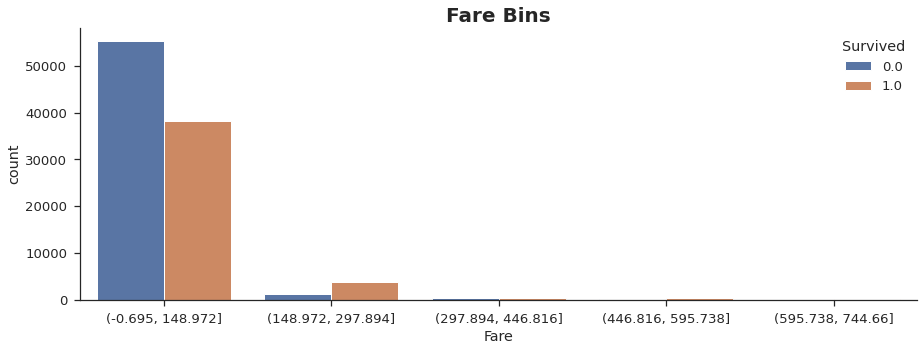

In [ ]:
auxfare = pd.cut(df['Fare'],5)
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x=auxfare, hue='Survived', data=df).set_title("Fare Bins",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()

In [ ]:
df['Fare'] = LabelEncoder().fit_transform(auxfare) 

In [ ]:
pd.crosstab(df['Fare'], df['Survived'])

Survived,0.0,1.0
Fare,,
0,55323,38182
1,1311,3791
2,391,386
3,194,342
4,7,73


In [ ]:
print("mean of embarked",df.Embarked.median())

df.Embarked.fillna(df.Embarked.median(), inplace = True)


mean of embarked 0.0


In [ ]:
print("Percentage of missing values in the Cabin column :" ,round(df.Cabin.isna().sum()/ len(df.Cabin)*100,2))

Percentage of missing values in the Cabin column : 69.35


In [ ]:
df.drop(['Cabin'], axis = 1, inplace = True)

In [ ]:
df.drop(['Name'], axis = 1, inplace = True)


In [ ]:
# I got the total number of each family adding SibSp and Parch. (1) is the same passenger.
df['FamilySize'] = df['SibSp'] + df['Parch']+1
df.drop(['SibSp','Parch'], axis = 1, inplace = True)

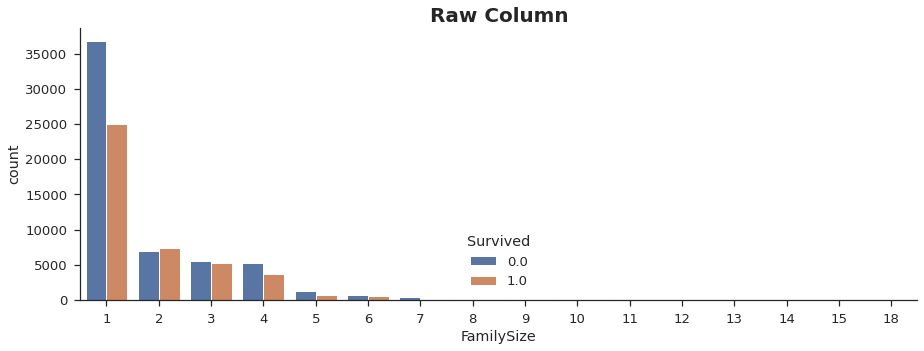

In [ ]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x='FamilySize', hue='Survived', data=df).set_title("Raw Column",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()


In [ ]:
# Binning FamilySize column
df.loc[ df['FamilySize'] == 1, 'FamilySize'] = 0                            # Alone
df.loc[(df['FamilySize'] > 1) & (df['FamilySize'] <= 4), 'FamilySize'] = 1  # Small Family 
df.loc[(df['FamilySize'] > 4) & (df['FamilySize'] <= 6), 'FamilySize'] = 2  # Medium Family
df.loc[df['FamilySize']  > 6, 'FamilySize'] = 3                             # Large Family 

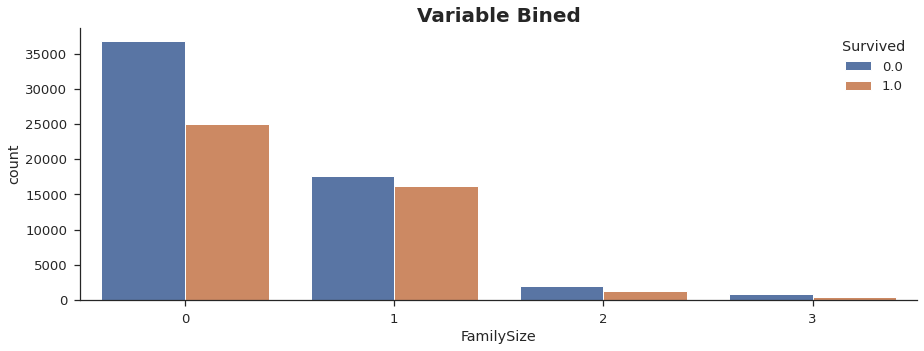

In [ ]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x='FamilySize', hue='Survived', data=df).set_title("Variable Bined",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()


In [ ]:
df['Ticket'] = df['Ticket'].str.extract('(\d+)', expand=False)

In [ ]:
#df['Ticket'] = df.Ticket.str.split().apply(lambda x : 0 if x[:][-1] == 'LINE' else x[:][-1])
df['Ticket'].fillna((df['Ticket'].median()), inplace=True)

In [ ]:
df.Ticket = df.Ticket.values.astype('int64')

In [ ]:
df.isna().sum()

Survived      100000
Pclass             0
Sex                0
Age                0
Ticket             0
Fare               0
Embarked           0
FamilySize         0
dtype: int64

In [ ]:
eeew sdf

SyntaxError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Survived    100000 non-null  float64
 1   Pclass      200000 non-null  int64  
 2   Sex         200000 non-null  int64  
 3   Age         200000 non-null  int64  
 4   Ticket      200000 non-null  int64  
 5   Fare        200000 non-null  int64  
 6   Embarked    200000 non-null  float64
 7   FamilySize  200000 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 18.7 MB


In [ ]:
df #.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,FamilySize
PassengerId,,,,,,,,
0,1.0,1,1,1,209245,0,0.0,1
1,0.0,3,1,1,27323,0,0.0,0
2,0.0,3,1,0,457703,0,0.0,1
3,0.0,3,1,0,10866,0,0.0,0
4,1.0,3,1,1,427635,0,0.0,0
...,...,...,...,...,...,...,...,...
199995,NaN,3,0,1,7686,0,2.0,0
199996,NaN,1,1,2,13004,0,0.0,1
199997,NaN,3,1,2,4383317,0,0.0,0


In [ ]:
df['Survived'].isna().sum()

100000

In [ ]:
train = df[:100000]  #[:10]
print(train.shape)
test = df[100000:]
print(test.shape)

(100000, 8)
(100000, 8)


In [ ]:
train

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,FamilySize
PassengerId,,,,,,,,
0,1.0,1,1,1,209245,0,0.0,1
1,0.0,3,1,1,27323,0,0.0,0
2,0.0,3,1,0,457703,0,0.0,1
3,0.0,3,1,0,10866,0,0.0,0
4,1.0,3,1,1,427635,0,0.0,0
...,...,...,...,...,...,...,...,...
99995,1.0,2,0,2,15008,0,1.0,0
99996,0.0,2,1,3,13273,0,0.0,0
99997,0.0,3,1,1,37758,0,0.0,0


In [ ]:
test

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,FamilySize
PassengerId,,,,,,,,
100000,NaN,3,1,0,24745,0,0.0,0
100001,NaN,3,0,2,13264,0,0.0,0
100002,NaN,1,0,0,25990,0,1.0,0
100003,NaN,2,1,1,314011,0,0.0,0
100004,NaN,1,0,0,26203,0,1.0,1
...,...,...,...,...,...,...,...,...
199995,NaN,3,0,1,7686,0,2.0,0
199996,NaN,1,1,2,13004,0,0.0,1
199997,NaN,3,1,2,4383317,0,0.0,0


In [ ]:
train.info()

In [ ]:
clf1 = setup(data = train, 
             target = 'Survived',
             numeric_imputation = 'mean',
             categorical_features = ['Pclass','Sex','Age','Fare','Embarked','FamilySize'], 
             ignore_features = [],
             silent = True)

,Description,Value
0,session_id,1978
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(100000, 8)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7704,0.8394,0.7351,0.7299,0.7324,0.5313,0.5314,5.995
lightgbm,Light Gradient Boosting Machine,0.7700,0.8390,0.7375,0.7281,0.7327,0.5309,0.5309,0.814
ada,Ada Boost Classifier,0.7669,0.8338,0.6875,0.7472,0.7161,0.5189,0.5203,1.802
ridge,Ridge Classifier,0.7621,0.0000,0.7310,0.7179,0.7243,0.5151,0.5152,0.076
lda,Linear Discriminant Analysis,0.7621,0.8295,0.7313,0.7178,0.7244,0.5152,0.5154,0.278
rf,Random Forest Classifier,0.6896,0.7692,0.6415,0.6359,0.6386,0.3666,0.3667,7.758
et,Extra Trees Classifier,0.6895,0.7345,0.6383,0.6365,0.6374,0.3659,0.3659,7.627
dt,Decision Tree Classifier,0.6871,0.6784,0.6344,0.6340,0.6342,0.3608,0.3608,0.316
qda,Quadratic Discriminant Analysis,0.5942,0.5697,0.4005,0.5609,0.4317,0.1437,0.1529,0.122
lr,Logistic Regression,0.5724,0.4986,0.0000,0.0000,0.0000,0.0000,0.0000,0.419


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1978, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
lgbm  = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7699,0.8384,0.7397,0.7269,0.7332,0.5309,0.5310
1,0.7681,0.8417,0.7240,0.7311,0.7275,0.5258,0.5258
2,0.7666,0.8349,0.7367,0.7227,0.7296,0.5243,0.5244
3,0.7634,0.8379,0.7267,0.7219,0.7243,0.5171,0.5171
4,0.7729,0.8429,0.7427,0.7305,0.7366,0.5370,0.5370
5,0.7701,0.8349,0.7297,0.7319,0.7308,0.5303,0.5303
6,0.7806,0.8483,0.7558,0.7375,0.7465,0.5531,0.5533
7,0.7697,0.8369,0.7414,0.7259,0.7336,0.5308,0.5309
8,0.7680,0.8314,0.7465,0.7210,0.7335,0.5282,0.5285
9,0.7705,0.8428,0.7314,0.7319,0.7316,0.5312,0.5312


In [ ]:
tuned_lightgbm = tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7711,0.8384,0.7394,0.7292,0.7342,0.5333,0.5333
1,0.7709,0.8431,0.7314,0.7324,0.7319,0.5318,0.5318
2,0.7691,0.8349,0.7377,0.7266,0.7321,0.5293,0.5294
3,0.7657,0.8378,0.7297,0.7244,0.7270,0.5218,0.5218
4,0.7729,0.8443,0.7464,0.7289,0.7375,0.5374,0.5375
5,0.7720,0.8358,0.7300,0.7349,0.7325,0.5338,0.5338
6,0.7811,0.8490,0.7531,0.7397,0.7464,0.5539,0.5540
7,0.7676,0.8376,0.7350,0.7251,0.7300,0.5260,0.5260
8,0.7673,0.8323,0.7351,0.7247,0.7299,0.5255,0.5255
9,0.7714,0.8426,0.7337,0.7322,0.7330,0.5331,0.5331


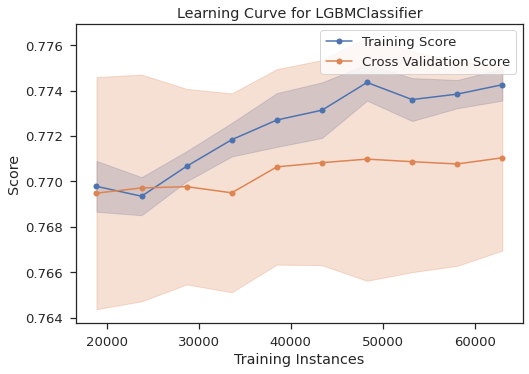

In [ ]:
plot_model(estimator = tuned_lightgbm, plot = 'learning')

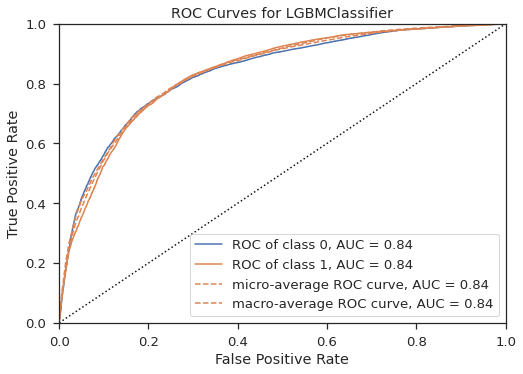

In [ ]:
plot_model(estimator = tuned_lightgbm, plot = 'auc')

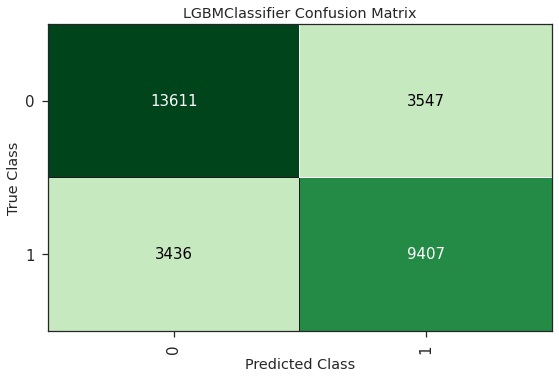

In [ ]:
plot_model(estimator = tuned_lightgbm, plot = 'confusion_matrix')


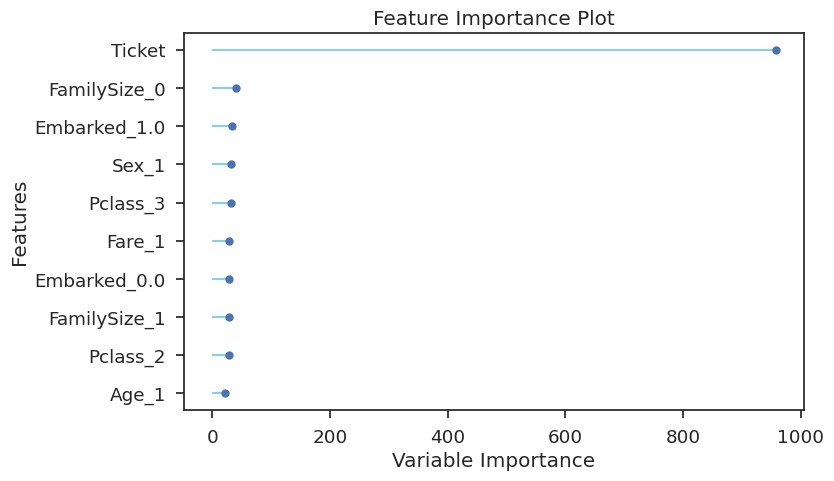

In [ ]:
plot_model(estimator = tuned_lightgbm, plot = 'feature')

In [ ]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

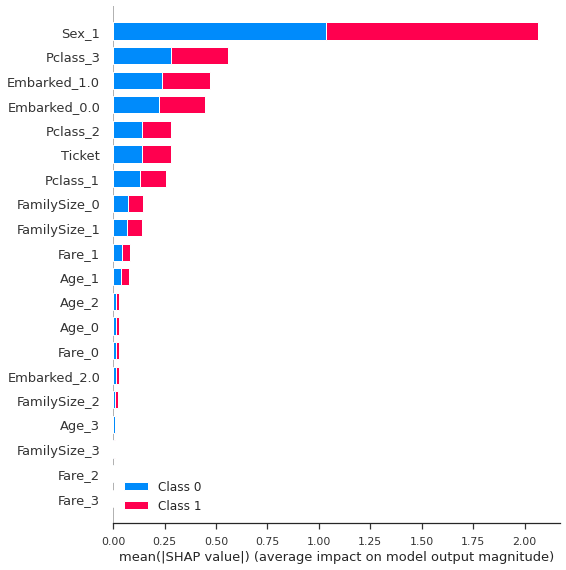

In [ ]:
!pip install shap
interpret_model(tuned_lightgbm)

In [ ]:
predict_model(tuned_lightgbm, data=train) #train


In [ ]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import lightgbm as lgb

In [ ]:
# Importing the dataset
y = train.Survived # Splitting the dataset into the Training set and Test set
x = train.drop(['Survived'], axis = 1)


#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.0, random_state = 0)# Feature Scaling
d_train = lgb.Dataset(x, label=y)

params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)

[LightGBM] [Info] Number of positive: 42774, number of negative: 57226
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 277
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.427740 -> initscore=-0.291078
[LightGBM] [Info] Start training from score -0.291078


In [ ]:
print(x.columns)
print(test.columns)
x_test = test.drop(['Survived'], axis = 1)
print(x_test.head())

Index(['Pclass', 'Sex', 'Age', 'Ticket', 'Fare', 'Embarked', 'FamilySize'], dtype='object')
Index(['Survived', 'Pclass', 'Sex', 'Age', 'Ticket', 'Fare', 'Embarked',
       'FamilySize'],
      dtype='object')
             Pclass  Sex  Age  Ticket  Fare  Embarked  FamilySize
PassengerId                                                      
100000            3    1    0   24745     0       0.0           0
100001            3    0    2   13264     0       0.0           0
100002            1    0    0   25990     0       1.0           0
100003            2    1    1  314011     0       0.0           0
100004            1    0    0   26203     0       1.0           1


In [ ]:
#Prediction
y_pred=clf.predict(x_test)

In [ ]:
#convert into binary values
for i in range(len(y_pred)):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0

In [ ]:
len(y_pred)

100000

In [ ]:
sub = pd.DataFrame()

sub['PassengerId'] = test['PassengerId']
#submision = test
sub['Survived']=pd.Series(y_pred)
sub

,PassengerId,Survived
0,100000,0.0
1,100001,0.0
2,100002,1.0
3,100003,0.0
4,100004,1.0
...,...,...
99995,199995,0.0
99996,199996,0.0
99997,199997,0.0
99998,199998,1.0


In [ ]:
test = test.reset_index()
test

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,FamilySize
0,100000,NaN,3,1,0,24745,0,0.0,0
1,100001,NaN,3,0,2,13264,0,0.0,0
2,100002,NaN,1,0,0,25990,0,1.0,0
3,100003,NaN,2,1,1,314011,0,0.0,0
4,100004,NaN,1,0,0,26203,0,1.0,1
...,...,...,...,...,...,...,...,...,...
99995,199995,NaN,3,0,1,7686,0,2.0,0
99996,199996,NaN,1,1,2,13004,0,0.0,1
99997,199997,NaN,3,1,2,4383317,0,0.0,0
99998,199998,NaN,1,0,2,26988,0,1.0,1


In [ ]:
predictions = predict_model(tuned_lightgbm, data=test)  #test


In [ ]:
predictions.tail()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,FamilySize,Label,Score
PassengerId,,,,,,,,,,
199995,NaN,3,0,1,7686,0,2.0,0,1.0,0.5799
199996,NaN,1,1,2,13004,0,0.0,1,0.0,0.7942
199997,NaN,3,1,2,4383317,0,0.0,0,0.0,0.9178
199998,NaN,1,0,2,26988,0,1.0,1,1.0,0.7885
199999,NaN,1,0,1,41824,1,1.0,1,1.0,0.8555


In [ ]:
s = predictions['Score']
s

In [ ]:
#Survived = round(predictions['Score']).astype(int)
Survived = predictions['Score']
submission = pd.DataFrame({'PassengerId':predictions['PassengerId'],'Survived':Survived})
submission.head()
submission.to_csv('submission_train.csv')


In [ ]:
sub.to_csv('submission2.csv')

In [ ]:
from google.colab import files
files.download("submission2.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Regression

In [ ]:
from pycaret.regression import *

In [ ]:
reg = setup(data = train, 
             target = 'Survived',
             numeric_imputation = 'mean',
             categorical_features = ['Sex','Embarked'], 
             ignore_features = ['Name','Ticket','Cabin'],
             silent = True)

In [ ]:
compare_models()

In [ ]:
cb = create_model('lightgbm')
#predictions = predict_model(Gradient Boosting Regressor, data = test)